# Customer-Satisfaction-Prediction

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline

# make with this report 
import pandas_profiling

# gnore all warnings
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# preprocessing imports 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Alogrithim 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


# Hyperpearmeter turning 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


## model accuary metrices 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


## dorp the model in pickle 
import pickle


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24316\2487846190.py:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


# Load the data

In [3]:
# Load the data into a DataFrame
df = pd.read_csv('D:\Customer-Satisfaction-Prediction\data\customer_support_tickets.csv')

In [4]:
df.head(3)

Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   

             Ticket Subject  \
0             Product setup   
1  Peripheral compatibility   
2           Network problem   

                                  Ticket Description  \
0  I'm having an issue with the {product_purchase...   
1  I'm having an issue with the {product_purchase...   
2  I'm facing a problem with my {product_purchase...   

               Ticket Status                                    Resolution  \
0  Pending Customer Response                                           NaN   
1  Pending Customer Response                                           NaN   
2                     Closed  Case maybe show recently my computer follow.   

  Ticket Priority Ticket Channel  First Response Time   Time to Resolution  \
0        Critical   Social media  2023-06-01 12:15:36                  NaN   
1        Critical           Chat  2023-06-01 16:45:38                  NaN   
2             Low   Social media  2023-06-01 11:14:38  2023-06-01 18:05:38   

   Customer Satisfaction Rating  
0                           NaN  
1                           NaN  
2                           3.0

In [5]:
from ydata_profiling import ProfileReport
# Create the profile report
profile = ProfileReport(df, title="Customer Satisfaction Data Report", explorative=True)

# Display report inside Jupyter Notebook
display(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.head(2)

Ticket ID  Customer Name              Customer Email  Customer Age  \
0          1  Marisa Obrien  carrollallison@example.com            32   
1          2   Jessica Rios    clarkeashley@example.com            42   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   

             Ticket Subject  \
0             Product setup   
1  Peripheral compatibility   

                                  Ticket Description  \
0  I'm having an issue with the {product_purchase...   
1  I'm having an issue with the {product_purchase...   

               Ticket Status Resolution Ticket Priority Ticket Channel  \
0  Pending Customer Response        NaN        Critical   Social media   
1  Pending Customer Response        NaN        Critical           Chat   

   First Response Time Time to Resolution  Customer Satisfaction Rating  
0  2023-06-01 12:15:36                NaN                           NaN  
1  2023-06-01 16:45:38                NaN                           NaN

In [7]:
# Display column names
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating']


In [8]:
## cheking the shape
df.shape

(8469, 17)

In [9]:
## checking info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [10]:
## checking the values of the data
null_values = df.isnull().sum()

print(f"null values: \n {null_values}")

null values: 
 Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


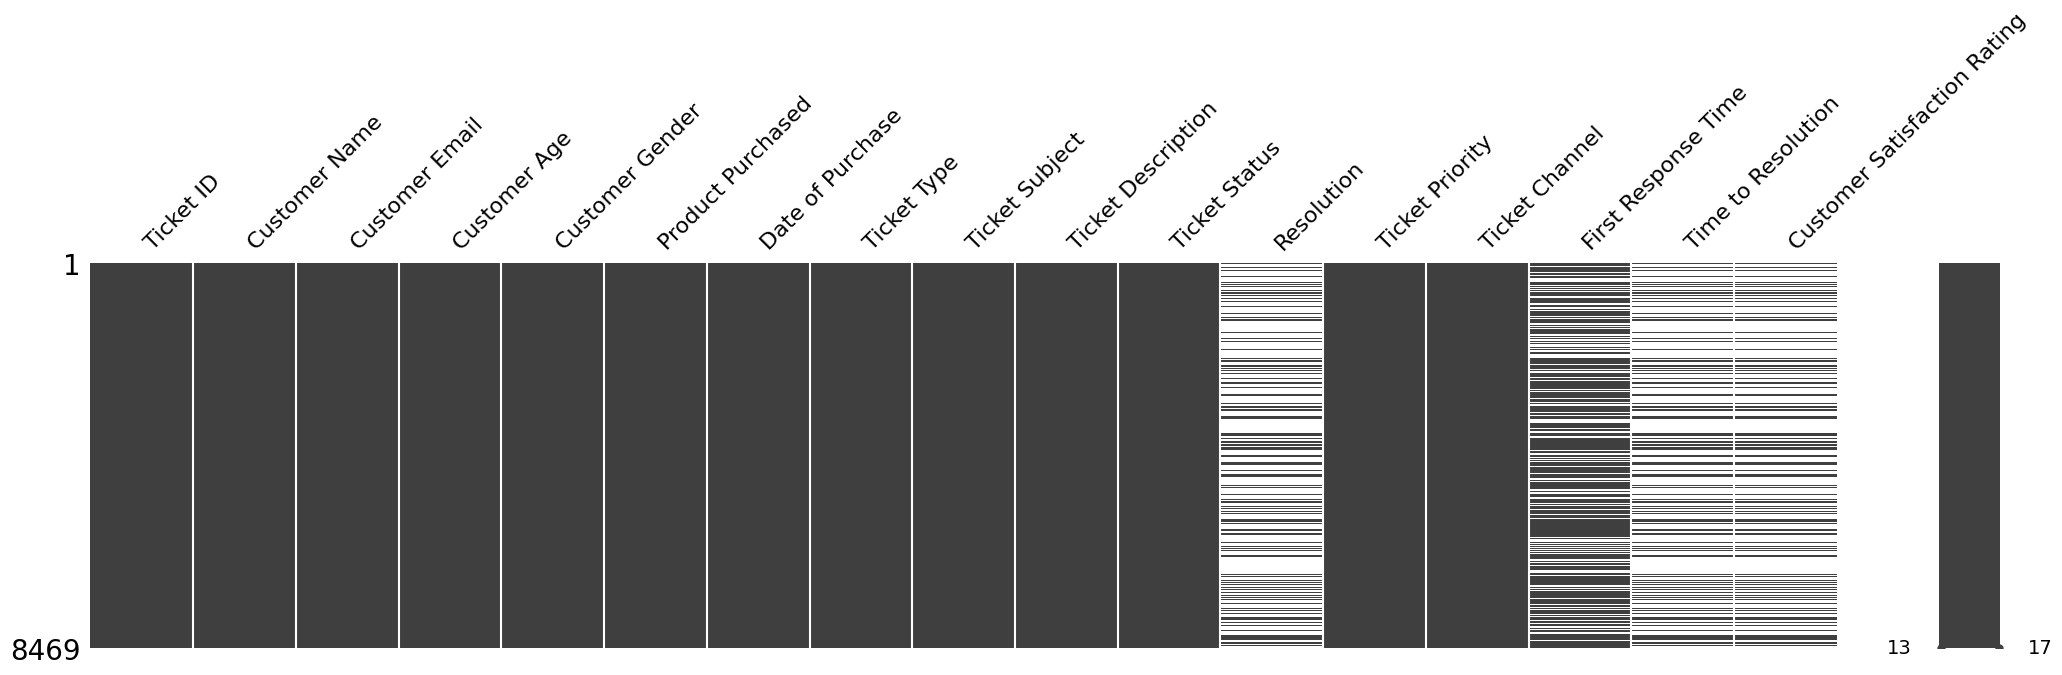

In [11]:
# How many missing values are there in our dataset?
import missingno as msno
msno.matrix(df, figsize = (25,5))
plt.show()

In [12]:
# Checking the percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100

# Display the missing values percentage
print("Percentage of Missing Values:\n")
print(missing_percent)


Percentage of Missing Values:

Ticket ID                        0.000000
Customer Name                    0.000000
Customer Email                   0.000000
Customer Age                     0.000000
Customer Gender                  0.000000
Product Purchased                0.000000
Date of Purchase                 0.000000
Ticket Type                      0.000000
Ticket Subject                   0.000000
Ticket Description               0.000000
Ticket Status                    0.000000
Resolution                      67.304286
Ticket Priority                  0.000000
Ticket Channel                   0.000000
First Response Time             33.286102
Time to Resolution              67.304286
Customer Satisfaction Rating    67.304286
dtype: float64


# Data Preprocessing

This code drops columns with excessive missing values and imputes missing values in essential columns using the median to maintain data integrity.

In [13]:
df.head(3)

Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   

             Ticket Subject  \
0             Product setup   
1  Peripheral compatibility   
2           Network problem   

                                  Ticket Description  \
0  I'm having an issue with the {product_purchase...   
1  I'm having an issue with the {product_purchase...   
2  I'm facing a problem with my {product_purchase...   

               Ticket Status                                    Resolution  \
0  Pending Customer Response                                           NaN   
1  Pending Customer Response                                           NaN   
2                     Closed  Case maybe show recently my computer follow.   

  Ticket Priority Ticket Channel  First Response Time   Time to Resolution  \
0        Critical   Social media  2023-06-01 12:15:36                  NaN   
1        Critical           Chat  2023-06-01 16:45:38                  NaN   
2             Low   Social media  2023-06-01 11:14:38  2023-06-01 18:05:38   

   Customer Satisfaction Rating  
0                           NaN  
1                           NaN  
2                           3.0

In [14]:
import pandas as pd

df = df.drop(columns=['Resolution', 'Time to Resolution'])  # No inplace=True


To predict Customer Satisfaction Rating, we should select features that are likely to influence customer satisfaction. Based on this dataset, the following columns seem useful for making a predictive model:


 <ul>
        <li><strong>Customer Age</strong> – Older or younger customers may have different satisfaction levels.</li>
        <li><strong>Customer Gender</strong> – Satisfaction may vary based on gender preferences.</li>
        <li><strong>Product Purchased</strong> – Different products may have different satisfaction levels.</li>
        <li><strong>Ticket Type</strong> – Some ticket types (e.g., billing issues) might lead to lower satisfaction.</li>
        <li><strong>Ticket Subject</strong> – The topic of the issue may affect satisfaction.</li>
        <li><strong>Ticket Status</strong> – Resolved vs. pending tickets can impact satisfaction.</li>
        <li><strong>Ticket Priority</strong> – High-priority issues might correlate with satisfaction.</li>
        <li><strong>Ticket Channel</strong> – Some channels (e.g., chat vs. email) may lead to different satisfaction levels.</li>
        <li><strong>First Response Time</strong> – Faster responses generally improve satisfaction.</li>
        <li><strong>Customer Satisfaction Rating</strong></li>
    </ul>

In [15]:
# Select Useful Features
selected_features = [
    'Customer Age', 'Customer Gender', 'Product Purchased', 'Ticket Type', 
    'Ticket Subject', 'Ticket Status', 'Ticket Priority', 'Ticket Channel', 
    'First Response Time', 'Customer Satisfaction Rating'  # Corrected
]

# Store selected features in a new DataFrame
df_selected = df[selected_features]
df = df_selected
# Display the first few rows of the new DataFrame
df_selected.head()



Customer Age Customer Gender Product Purchased      Ticket Type  \
0            32           Other        GoPro Hero  Technical issue   
1            42          Female       LG Smart TV  Technical issue   
2            48           Other          Dell XPS  Technical issue   
3            27          Female  Microsoft Office  Billing inquiry   
4            67          Female  Autodesk AutoCAD  Billing inquiry   

             Ticket Subject              Ticket Status Ticket Priority  \
0             Product setup  Pending Customer Response        Critical   
1  Peripheral compatibility  Pending Customer Response        Critical   
2           Network problem                     Closed             Low   
3            Account access                     Closed             Low   
4                 Data loss                     Closed             Low   

  Ticket Channel  First Response Time  Customer Satisfaction Rating  
0   Social media  2023-06-01 12:15:36                           NaN  
1           Chat  2023-06-01 16:45:38                           NaN  
2   Social media  2023-06-01 11:14:38                           3.0  
3   Social media  2023-06-01 07:29:40                           3.0  
4          Email  2023-06-01 00:12:42                           1.0

In [16]:
## checking the values of the data
null_values = df.isnull().sum()

print(f"null values: \n {null_values}")

null values: 
 Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Ticket Type                        0
Ticket Subject                     0
Ticket Status                      0
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Customer Satisfaction Rating    5700
dtype: int64


In [17]:

# Get value counts (probability distribution)
rating_probs = df['Customer Satisfaction Rating'].dropna().value_counts(normalize=True)

# Fill missing values with random choices based on probability distribution
missing_indices = df['Customer Satisfaction Rating'].isnull()
df.loc[missing_indices, 'Customer Satisfaction Rating'] = np.random.choice(
    rating_probs.index, 
    size=missing_indices.sum(), 
    p=rating_probs.values
)


In [18]:
## checking the values of the data
null_values = df.isnull().sum()

print(f"null values: \n {null_values}")

null values: 
 Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Ticket Type                        0
Ticket Subject                     0
Ticket Status                      0
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Customer Satisfaction Rating       0
dtype: int64


In [19]:
df['First Response Time']

0       2023-06-01 12:15:36
1       2023-06-01 16:45:38
2       2023-06-01 11:14:38
3       2023-06-01 07:29:40
4       2023-06-01 00:12:42
               ...         
8464                    NaN
8465                    NaN
8466    2023-06-01 09:44:22
8467    2023-06-01 18:28:24
8468                    NaN
Name: First Response Time, Length: 8469, dtype: object

In [20]:
# Count missing values
missing_count = df['First Response Time'].isnull().sum()
print(f"Missing Values: {missing_count}")


Missing Values: 2819


In [21]:
import pandas as pd

# Convert 'First Response Time' to datetime format
df['First Response Time'] = pd.to_datetime(df['First Response Time'])

# Calculate the median response time
median_time = df['First Response Time'].median()

# Fill missing values with the median time
df['First Response Time'].fillna(median_time, inplace=True)

# Verify if missing values are handled
print(df['First Response Time'].isnull().sum())  # Should print 0


0


In [22]:
## checking the values of the data
null_values = df.isnull().sum()

print(f"null values: \n {null_values}")

null values: 
 Customer Age                    0
Customer Gender                 0
Product Purchased               0
Ticket Type                     0
Ticket Subject                  0
Ticket Status                   0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Customer Satisfaction Rating    0
dtype: int64


In [23]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"The dupicates values : {duplicates}")

The dupicates values : 0


In [24]:
# Drop duplicate rows
df = df.drop_duplicates()

# Verify if duplicates are removed
print("Duplicate values after removal:", df.duplicated().sum())

Duplicate values after removal: 0


In [25]:
df.head()

Customer Age Customer Gender Product Purchased      Ticket Type  \
0            32           Other        GoPro Hero  Technical issue   
1            42          Female       LG Smart TV  Technical issue   
2            48           Other          Dell XPS  Technical issue   
3            27          Female  Microsoft Office  Billing inquiry   
4            67          Female  Autodesk AutoCAD  Billing inquiry   

             Ticket Subject              Ticket Status Ticket Priority  \
0             Product setup  Pending Customer Response        Critical   
1  Peripheral compatibility  Pending Customer Response        Critical   
2           Network problem                     Closed             Low   
3            Account access                     Closed             Low   
4                 Data loss                     Closed             Low   

  Ticket Channel First Response Time  Customer Satisfaction Rating  
0   Social media 2023-06-01 12:15:36                           4.0  
1           Chat 2023-06-01 16:45:38                           2.0  
2   Social media 2023-06-01 11:14:38                           3.0  
3   Social media 2023-06-01 07:29:40                           3.0  
4          Email 2023-06-01 00:12:42                           1.0

In [26]:
# Convert timestamp to datetime
df['First Response Time'] = pd.to_datetime(df['First Response Time'])
# Extract hour from response timestamp
df['hour'] = df['First Response Time'].dt.hour

# Extract day of the week (Monday=0, Sunday=6)
df['day_of_week'] = df['First Response Time'].dt.dayofweek



In [27]:
df.head()

Customer Age Customer Gender Product Purchased      Ticket Type  \
0            32           Other        GoPro Hero  Technical issue   
1            42          Female       LG Smart TV  Technical issue   
2            48           Other          Dell XPS  Technical issue   
3            27          Female  Microsoft Office  Billing inquiry   
4            67          Female  Autodesk AutoCAD  Billing inquiry   

             Ticket Subject              Ticket Status Ticket Priority  \
0             Product setup  Pending Customer Response        Critical   
1  Peripheral compatibility  Pending Customer Response        Critical   
2           Network problem                     Closed             Low   
3            Account access                     Closed             Low   
4                 Data loss                     Closed             Low   

  Ticket Channel First Response Time  Customer Satisfaction Rating  hour  \
0   Social media 2023-06-01 12:15:36                           4.0    12   
1           Chat 2023-06-01 16:45:38                           2.0    16   
2   Social media 2023-06-01 11:14:38                           3.0    11   
3   Social media 2023-06-01 07:29:40                           3.0     7   
4          Email 2023-06-01 00:12:42                           1.0     0   

   day_of_week  
0            3  
1            3  
2            3  
3            3  
4            3

In [28]:
df = df.drop(columns=['First Response Time'], axis = 1)


In [29]:
df.head(5)

Customer Age Customer Gender Product Purchased      Ticket Type  \
0            32           Other        GoPro Hero  Technical issue   
1            42          Female       LG Smart TV  Technical issue   
2            48           Other          Dell XPS  Technical issue   
3            27          Female  Microsoft Office  Billing inquiry   
4            67          Female  Autodesk AutoCAD  Billing inquiry   

             Ticket Subject              Ticket Status Ticket Priority  \
0             Product setup  Pending Customer Response        Critical   
1  Peripheral compatibility  Pending Customer Response        Critical   
2           Network problem                     Closed             Low   
3            Account access                     Closed             Low   
4                 Data loss                     Closed             Low   

  Ticket Channel  Customer Satisfaction Rating  hour  day_of_week  
0   Social media                           4.0    12            3  
1           Chat                           2.0    16            3  
2   Social media                           3.0    11            3  
3   Social media                           3.0     7            3  
4          Email                           1.0     0            3

Identify Categorical Columns

In [30]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['Customer Gender', 'Product Purchased', 'Ticket Type', 'Ticket Subject',
       'Ticket Status', 'Ticket Priority', 'Ticket Channel'],
      dtype='object')


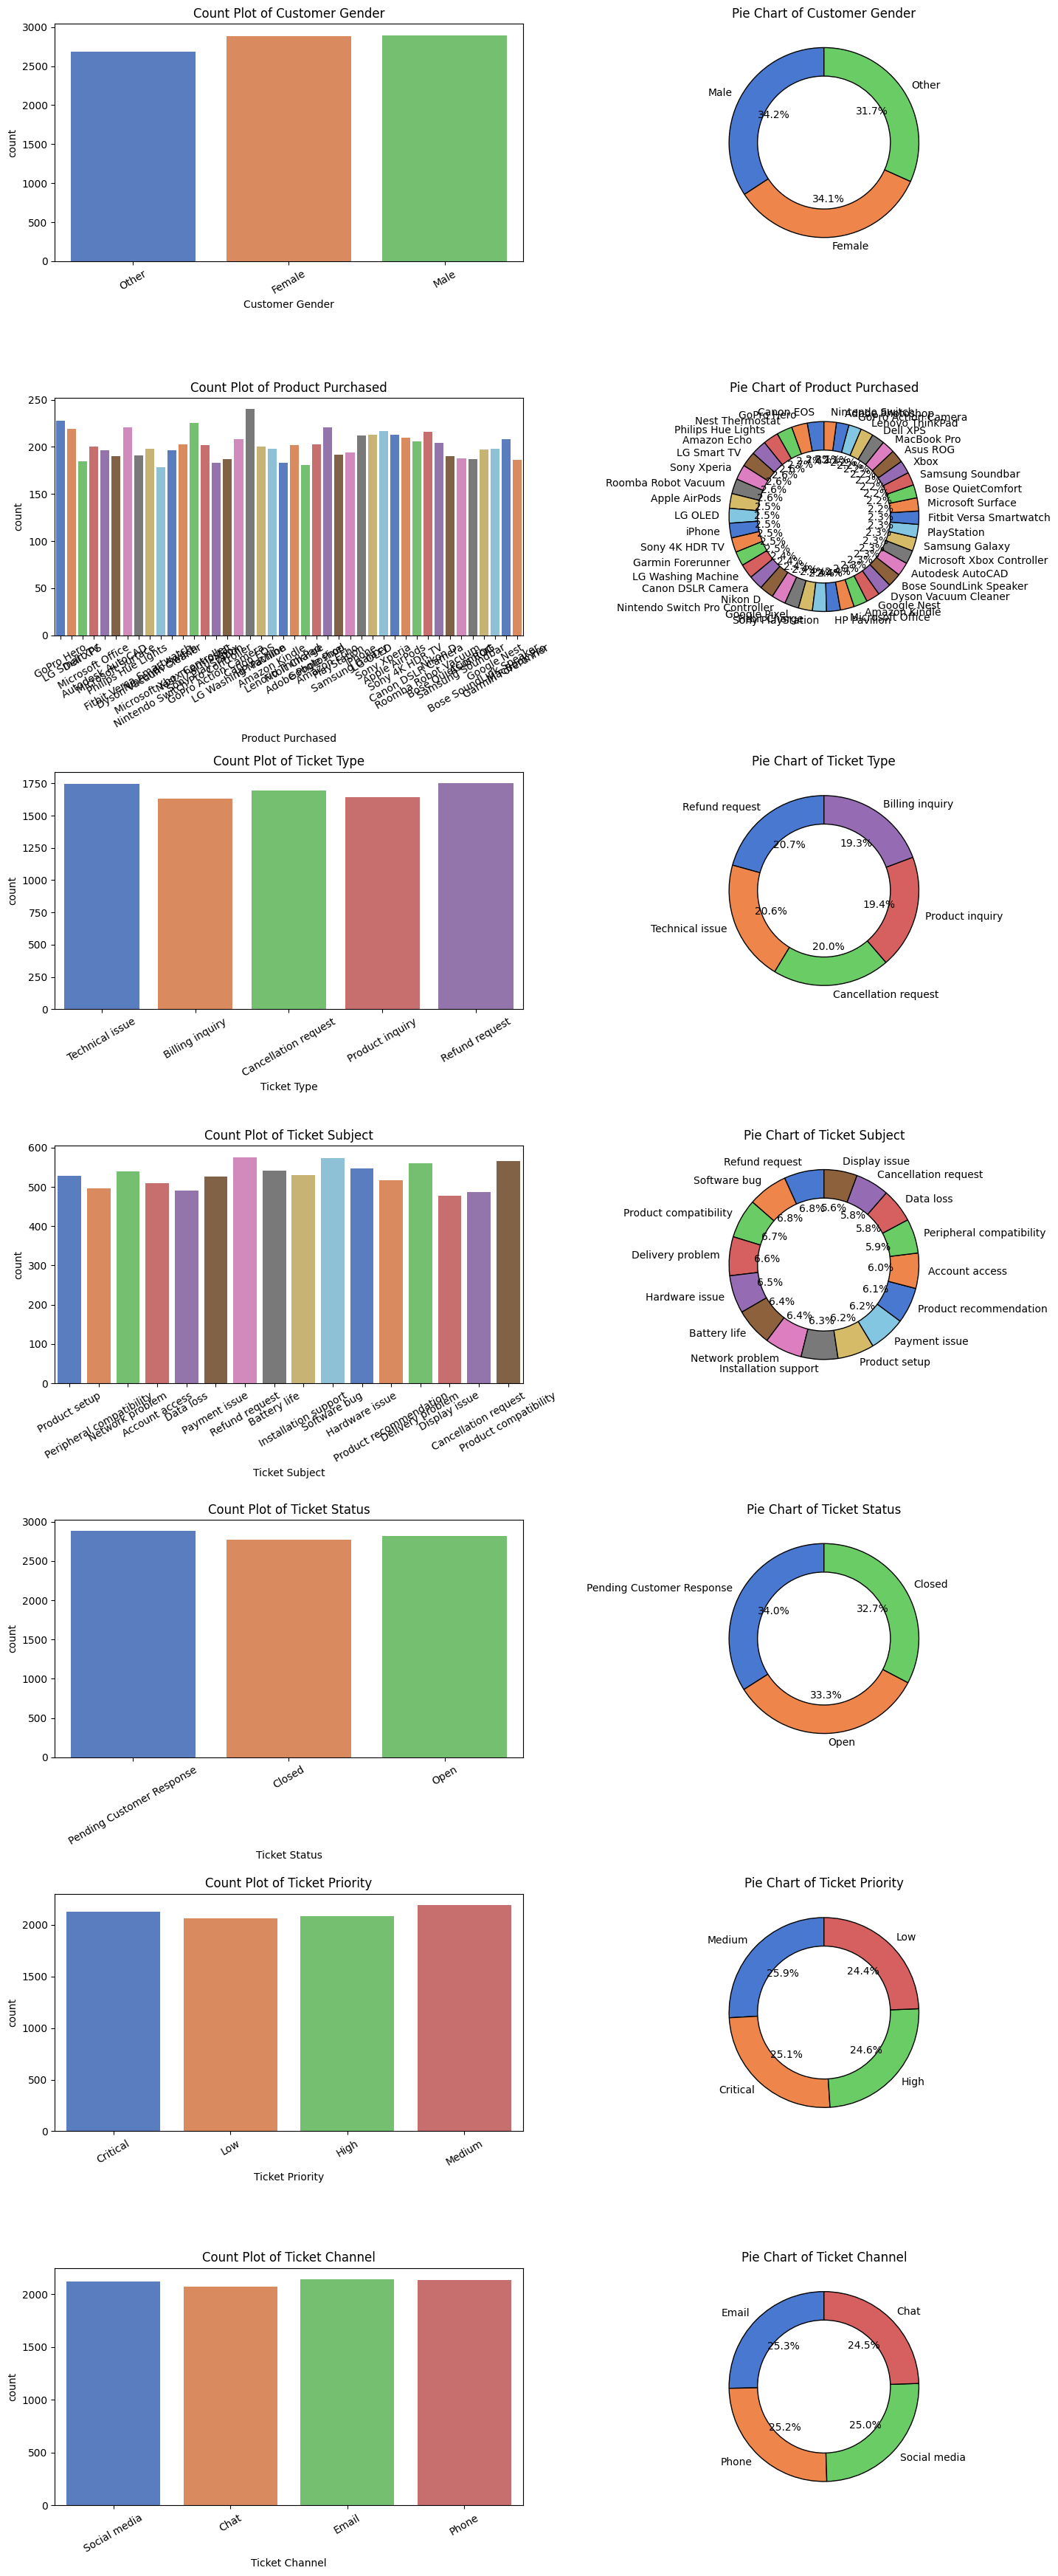

In [31]:
import matplotlib.pyplot as plt

# List of categorical columns
categorical_columns = ['Customer Gender', 'Product Purchased', 'Ticket Type', 'Ticket Subject',
       'Ticket Status', 'Ticket Priority', 'Ticket Channel']


# Plot count plots and pie charts
fig, axes = plt.subplots(len(categorical_columns), 2, figsize=(15, 5 * len(categorical_columns)))

for i, column in enumerate(categorical_columns):
    # Count plot
    sns.countplot(data=df, x=column, ax=axes[i, 0], palette='muted')
    axes[i, 0].set_title(f"Count Plot of {column}")
    axes[i, 0].tick_params(axis='x', rotation=30)

    # Pie chart
    df[column].value_counts().plot.pie(
        ax=axes[i, 1],
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('muted'),
        labels=df[column].value_counts().index, wedgeprops={'edgecolor': 'black', 'width': 0.3}
    )
    axes[i, 1].set_ylabel('')  # Remove y-axis label for the pie chart
    axes[i, 1].set_title(f"Pie Chart of {column}")

plt.tight_layout()
plt.show()

In [32]:
df['Product Purchased']

0                   GoPro Hero
1                  LG Smart TV
2                     Dell XPS
3             Microsoft Office
4             Autodesk AutoCAD
                 ...          
8464                   LG OLED
8465    Bose SoundLink Speaker
8466       GoPro Action Camera
8467               PlayStation
8468        Philips Hue Lights
Name: Product Purchased, Length: 8469, dtype: object

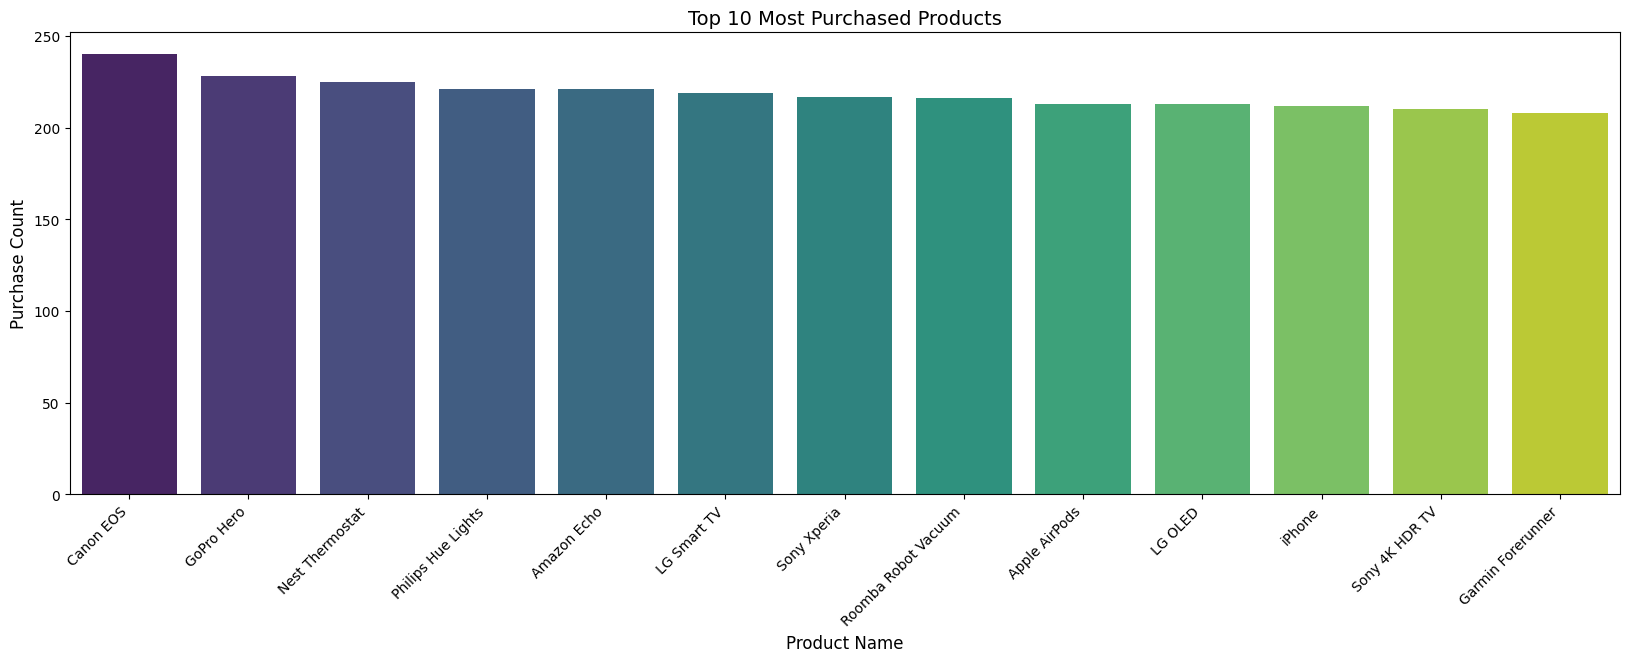

In [33]:

top_products = df['Product Purchased'].value_counts().nlargest(13)

# Set plot size
plt.figure(figsize=(20, 6))

# Create vertical bar plot
sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Top 10 Most Purchased Products', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Purchase Count', fontsize=12)

# Show plot
plt.show()


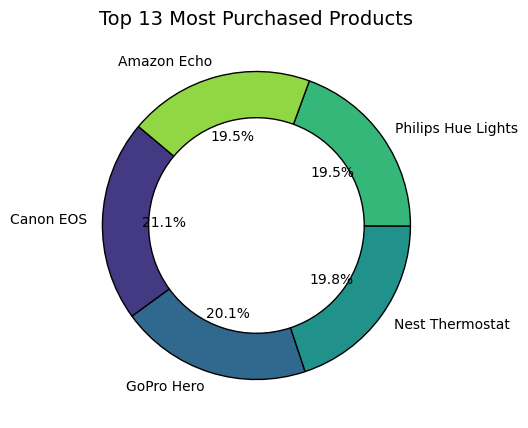

In [34]:
import matplotlib.pyplot as plt

# Get the top 13 purchased products
top_products = df['Product Purchased'].value_counts().nlargest(5)

# Set figure size
plt.figure(figsize=(5, 5))

# Create pie chart
plt.pie(
    top_products.values, 
    labels=top_products.index, 
    autopct='%1.1f%%',  # Show percentage
    colors=sns.color_palette('viridis', len(top_products)), 
    startangle=140,  # Rotate for better view
     wedgeprops={'edgecolor': 'black', 'width': 0.3}  # Add border for clarity
)

# Add title
plt.title('Top 13 Most Purchased Products', fontsize=14)

# Show plot
plt.show()


Identify Numerical Columns

In [35]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64','int32']).columns
numerical_columns

Index(['Customer Age', 'Customer Satisfaction Rating', 'hour', 'day_of_week'], dtype='object')

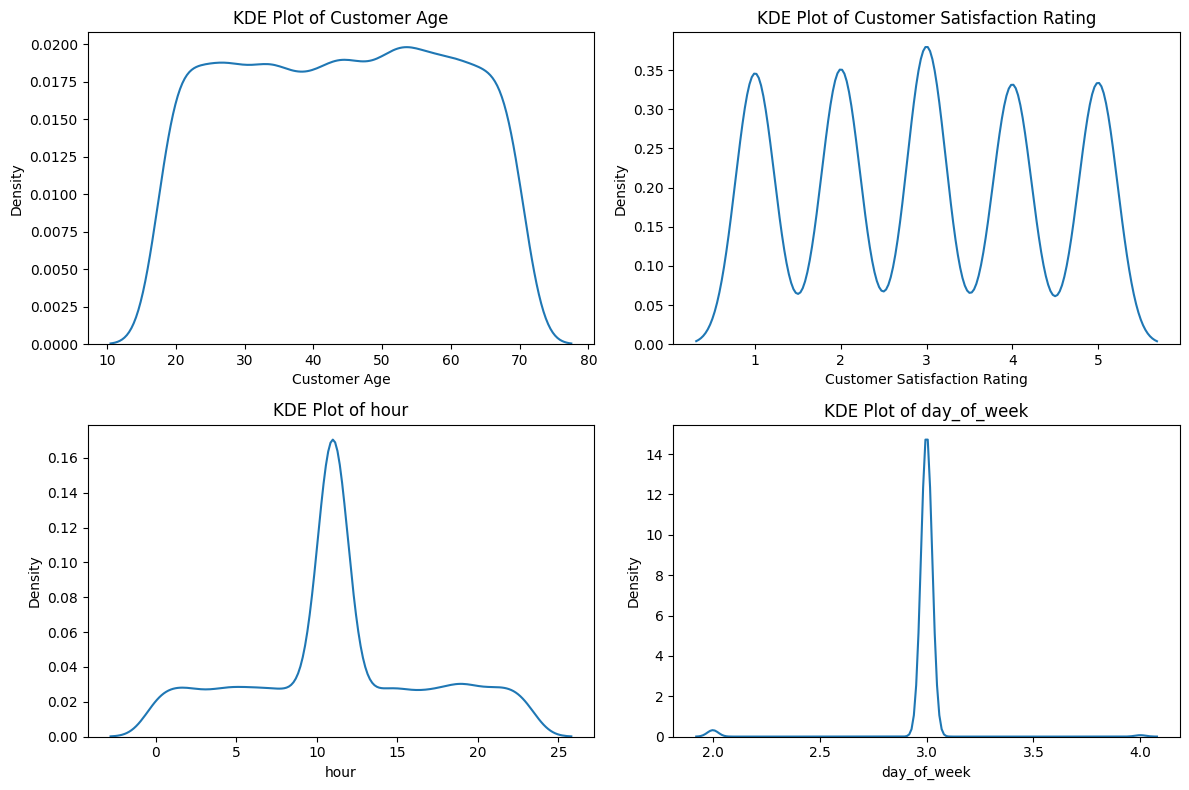

In [36]:
# Selected features
features = ['Customer Age', 'Customer Satisfaction Rating', 'hour', 'day_of_week']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot KDE for each feature
for i, feature in enumerate(features):
    sns.kdeplot(df[feature], ax=axes[i], fill=False)
    axes[i].set_title(f'KDE Plot of {feature}')

plt.tight_layout()
plt.show()


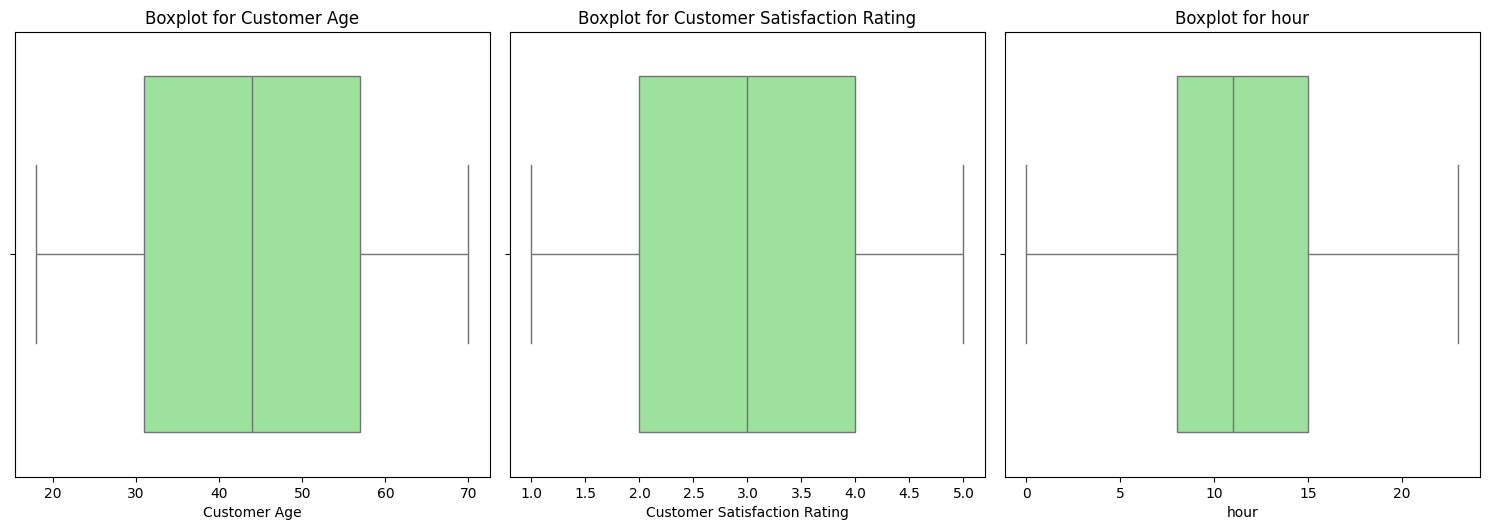

In [37]:
# List of numerical columns
numerical_columns =  ['Customer Age', 'Customer Satisfaction Rating', 'hour']

# Create a figure with subplots for each column
plt.figure(figsize=(15, 10))  # Adjust size based on the number of columns

# Loop through numerical columns and plot boxplots
for i, col in enumerate(numerical_columns, 1):  # Start index at 1 for subplot
    plt.subplot(2, 3, i)  # Create subplots (rows, columns, index)
    sns.boxplot(data=df, x=col, color="lightgreen")
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

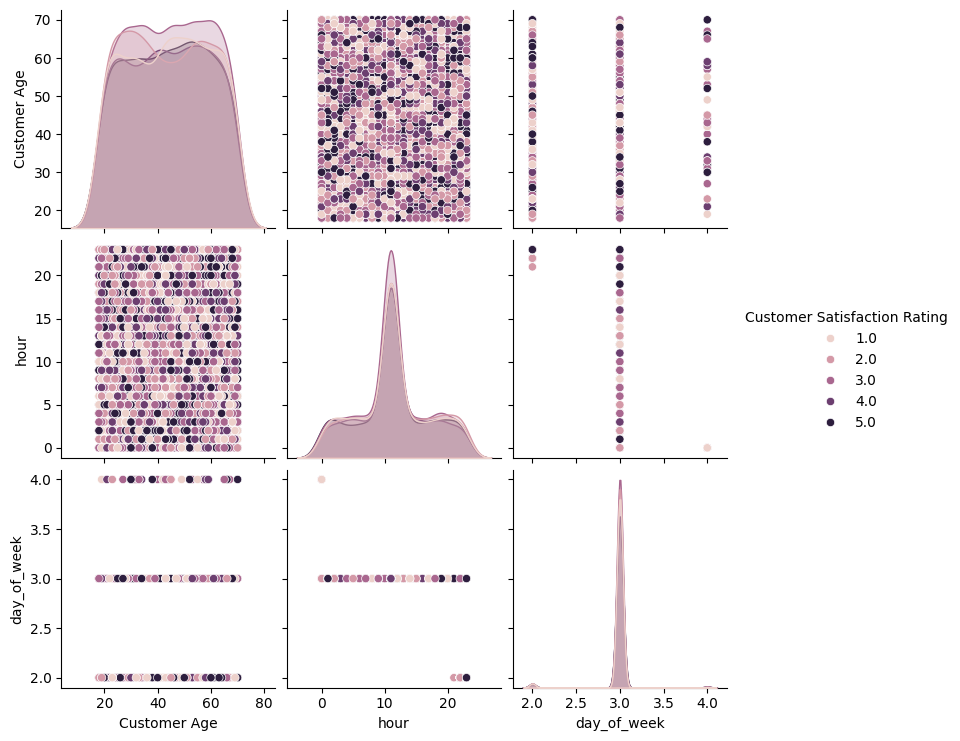

In [38]:
# Create a pairplot for the numerical columns
sns.pairplot(df,hue = 'Customer Satisfaction Rating')

# Show the plot
plt.show()

In [39]:
df.head()

Customer Age Customer Gender Product Purchased      Ticket Type  \
0            32           Other        GoPro Hero  Technical issue   
1            42          Female       LG Smart TV  Technical issue   
2            48           Other          Dell XPS  Technical issue   
3            27          Female  Microsoft Office  Billing inquiry   
4            67          Female  Autodesk AutoCAD  Billing inquiry   

             Ticket Subject              Ticket Status Ticket Priority  \
0             Product setup  Pending Customer Response        Critical   
1  Peripheral compatibility  Pending Customer Response        Critical   
2           Network problem                     Closed             Low   
3            Account access                     Closed             Low   
4                 Data loss                     Closed             Low   

  Ticket Channel  Customer Satisfaction Rating  hour  day_of_week  
0   Social media                           4.0    12            3  
1           Chat                           2.0    16            3  
2   Social media                           3.0    11            3  
3   Social media                           3.0     7            3  
4          Email                           1.0     0            3

In [40]:
df['Customer Satisfaction Rating']

0       4.0
1       2.0
2       3.0
3       3.0
4       1.0
       ... 
8464    1.0
8465    5.0
8466    3.0
8467    3.0
8468    4.0
Name: Customer Satisfaction Rating, Length: 8469, dtype: float64

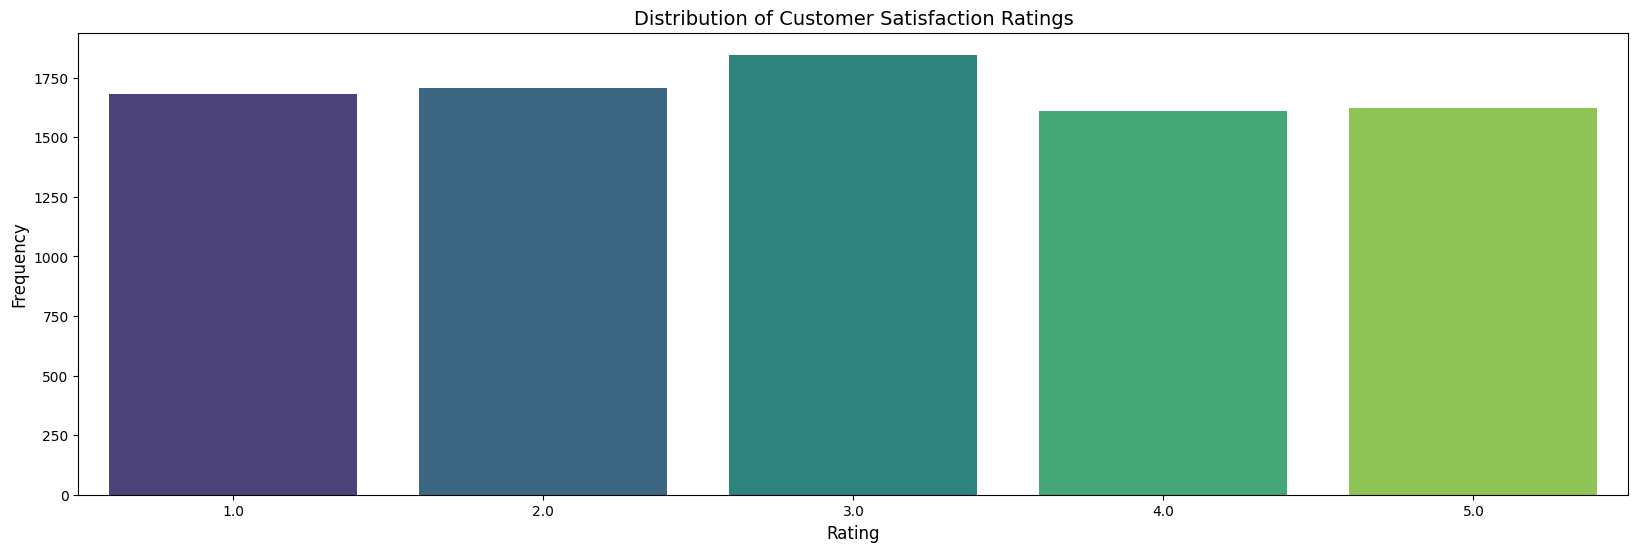

In [41]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Customer Satisfaction Rating', data=df, palette='viridis')
plt.title('Distribution of Customer Satisfaction Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


In [42]:
correlation_matrix =df.describe().corr()
correlation_matrix

Customer Age  Customer Satisfaction Rating  \
Customer Age                      1.000000                      0.999983   
Customer Satisfaction Rating      0.999983                      1.000000   
hour                              0.999991                      0.999998   
day_of_week                       0.999983                      1.000000   

                                  hour  day_of_week  
Customer Age                  0.999991     0.999983  
Customer Satisfaction Rating  0.999998     1.000000  
hour                          1.000000     0.999998  
day_of_week                   0.999998     1.000000

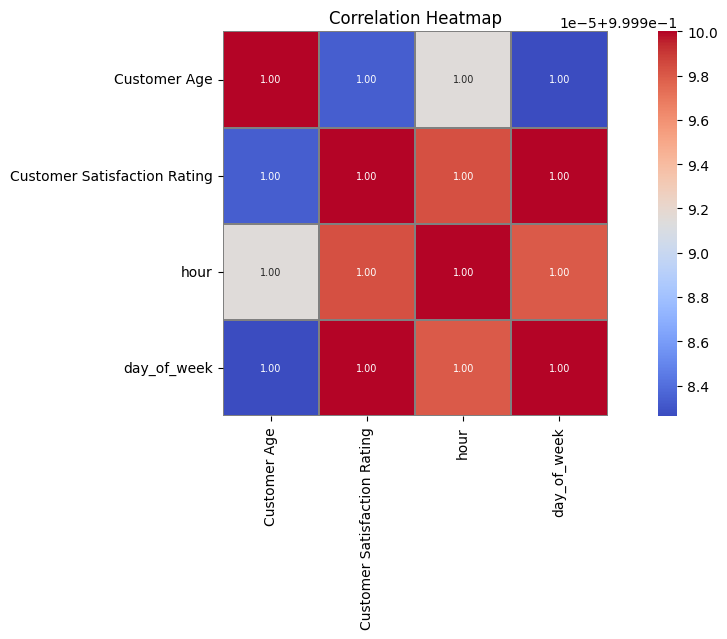

In [43]:
plt.figure(figsize=(13, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True,linewidths=0.3,linecolor='gray',annot_kws={"size": 7},fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

buliding the Model

In [44]:
df.head()


Customer Age Customer Gender Product Purchased      Ticket Type  \
0            32           Other        GoPro Hero  Technical issue   
1            42          Female       LG Smart TV  Technical issue   
2            48           Other          Dell XPS  Technical issue   
3            27          Female  Microsoft Office  Billing inquiry   
4            67          Female  Autodesk AutoCAD  Billing inquiry   

             Ticket Subject              Ticket Status Ticket Priority  \
0             Product setup  Pending Customer Response        Critical   
1  Peripheral compatibility  Pending Customer Response        Critical   
2           Network problem                     Closed             Low   
3            Account access                     Closed             Low   
4                 Data loss                     Closed             Low   

  Ticket Channel  Customer Satisfaction Rating  hour  day_of_week  
0   Social media                           4.0    12            3  
1           Chat                           2.0    16            3  
2   Social media                           3.0    11            3  
3   Social media                           3.0     7            3  
4          Email                           1.0     0            3

In [45]:
# Drop column 'B'
X = df.drop('Customer Satisfaction Rating', axis=1)
y = df['Customer Satisfaction Rating'] 

In [46]:
X.head(2)

Customer Age Customer Gender Product Purchased      Ticket Type  \
0            32           Other        GoPro Hero  Technical issue   
1            42          Female       LG Smart TV  Technical issue   

             Ticket Subject              Ticket Status Ticket Priority  \
0             Product setup  Pending Customer Response        Critical   
1  Peripheral compatibility  Pending Customer Response        Critical   

  Ticket Channel  hour  day_of_week  
0   Social media    12            3  
1           Chat    16            3

In [47]:
df['Product Purchased']

0                   GoPro Hero
1                  LG Smart TV
2                     Dell XPS
3             Microsoft Office
4             Autodesk AutoCAD
                 ...          
8464                   LG OLED
8465    Bose SoundLink Speaker
8466       GoPro Action Camera
8467               PlayStation
8468        Philips Hue Lights
Name: Product Purchased, Length: 8469, dtype: object

In [48]:
y.head()

0    4.0
1    2.0
2    3.0
3    3.0
4    1.0
Name: Customer Satisfaction Rating, dtype: float64

In [49]:
print(f"shape : {X.shape} , shape : {y.shape} ")

shape : (8469, 10) , shape : (8469,) 


In [50]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
print("X_train shape:",X_train.shape,"X_test shape :",X_test.shape ,"y_train shape :",y_train.shape,"y_test shape : ",y_test.shape)

X_train shape: (6775, 10) X_test shape : (1694, 10) y_train shape : (6775,) y_test shape :  (1694,)


In [52]:
print(numerical_columns)
print()
print(categorical_columns)

['Customer Age', 'Customer Satisfaction Rating', 'hour']

['Customer Gender', 'Product Purchased', 'Ticket Type', 'Ticket Subject', 'Ticket Status', 'Ticket Priority', 'Ticket Channel']


In [53]:
X_train.head()

Customer Age Customer Gender   Product Purchased           Ticket Type  \
2794            26           Other            Dell XPS  Cancellation request   
7497            23          Female  Philips Hue Lights  Cancellation request   
7646            27           Other   Canon DSLR Camera       Billing inquiry   
2726            20          Female   Microsoft Surface       Product inquiry   
4348            21            Male              iPhone        Refund request   

                Ticket Subject              Ticket Status Ticket Priority  \
2794  Peripheral compatibility  Pending Customer Response          Medium   
7497          Delivery problem  Pending Customer Response        Critical   
7646            Hardware issue                     Closed            High   
2726             Payment issue                     Closed          Medium   
4348            Hardware issue  Pending Customer Response             Low   

     Ticket Channel  hour  day_of_week  
2794           Chat     8            3  
7497   Social media    21            3  
7646          Phone    20            3  
2726          Phone    14            3  
4348          Phone     1            3

In [54]:
df['Ticket Channel']

0       Social media
1               Chat
2       Social media
3       Social media
4              Email
            ...     
8464           Phone
8465           Email
8466    Social media
8467           Email
8468           Phone
Name: Ticket Channel, Length: 8469, dtype: object

In [66]:
numerical_columns = ['Customer Age','hour','day_of_week']
categorical_Ordinal_features = ['Ticket Priority']
categorical_normial_features = ['Customer Gender','Product Purchased','Ticket Type']

In [67]:
# Preprocessing for numerical data (Standard scaling) and categorical data (One-Hot Encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('ohe', OneHotEncoder(sparse_output=False,handle_unknown='ignore'),categorical_normial_features), 

        ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),categorical_normial_features)
    ])

In [68]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Customer Age', 'hour', 'day_of_week']),
                                ('ohe',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Customer Gender', 'Product Purchased',
                                  'Ticket Type']),
                                ('ord',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['Customer Gender', 'Product Purchased',
                                  'Ticket Type'])])

In [69]:
# Dictionary of all classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Hist Gradient Boosting": HistGradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "Linear SVC": LinearSVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis()
}


In [70]:
# Define hyperparameters for tuning
param_grid = {
    "Logistic Regression": {"solver": ["liblinear"], "penalty": ["l1", "l2"], "C": [0.1, 1, 10]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20], "criterion": ["gini", "entropy"]},
    "Gradient Boosting": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.5], "max_depth": [3, 5, 10]},
    "AdaBoost": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1.0]},
    "Hist Gradient Boosting": {"max_iter": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.5], "max_depth": [3, 5, 10]},
    "Support Vector Classifier": {"kernel": ["linear", "rbf", "sigmoid"], "C": [0.1, 1, 10], "gamma": ["scale", "auto"]},
    "Linear SVC": {"C": [0.1, 1, 10], "loss": ["hinge", "squared_hinge"]},
    "K-Nearest Neighbors": {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"], "metric": ["euclidean", "manhattan"]},
    "Gaussian Naive Bayes": {"var_smoothing": [1e-9, 1e-8, 1e-7]},
    "Multinomial Naive Bayes": {"alpha": [0.1, 0.5, 1.0, 1.5]},
    "Bernoulli Naive Bayes": {"alpha": [0.1, 0.5, 1.0, 1.5]},
    "Decision Tree": {"max_depth": [3, 5, 10, None], "criterion": ["gini", "entropy"]},
    "Linear Discriminant Analysis": {"solver": ["svd", "lsqr", "eigen"]},
    "Quadratic Discriminant Analysis": {"reg_param": [0.0, 0.1, 0.5, 1.0]}
}

In [75]:
for name, clf in classifiers.items():
    try:
        # Retrieve hyperparameters from param_grid
        param_grid_for_clf = param_grid.get(name, {})

        # Create a pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', clf)
        ])
        
        # Randomized Search for Hyperparameter Tuning
        random_search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions={"classifier__" + key: value for key, value in param_grid_for_clf.items()},
            n_iter=10,
            scoring='f1_weighted',
            cv=3,
            random_state=42,
            verbose=1,
            n_jobs=-1
        )
        
        # Fit the model
        random_search.fit(X_train, y_train)
        
        # Get best estimator and predictions
        best_estimator = random_search.best_estimator_
        y_pred = best_estimator.predict(X_test)

        # Evaluate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        mean_cv_score = random_search.best_score_

        # Print results
        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {random_search.best_params_}")
        print(f"Mean CV Score: {mean_cv_score:.2f}")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("-" * 80)

    except Exception as e:
        print(f"Error with {name}: {e}")


Fitting 3 folds for each of 6 candidates, totalling 18 fits

Classifier: Logistic Regression
Best Parameters: {'classifier__solver': 'liblinear', 'classifier__penalty': 'l2', 'classifier__C': 1}
Mean CV Score: 0.20
Accuracy: 0.22
Precision: 0.21
Recall: 0.22
F1 Score: 0.20
Classification Report:
              precision    recall  f1-score   support

         1.0       0.22      0.15      0.18       331
         2.0       0.20      0.20      0.20       349
         3.0       0.25      0.42      0.31       388
         4.0       0.21      0.15      0.17       331
         5.0       0.15      0.11      0.13       295

    accuracy                           0.22      1694
   macro avg       0.20      0.21      0.20      1694
weighted avg       0.21      0.22      0.20      1694

Confusion Matrix:
[[ 51  63 123  43  51]
 [ 55  70 133  43  48]
 [ 47  79 162  54  46]
 [ 44  76 121  49  41]
 [ 40  59 118  45  33]]
--------------------------------------------------------------------------------

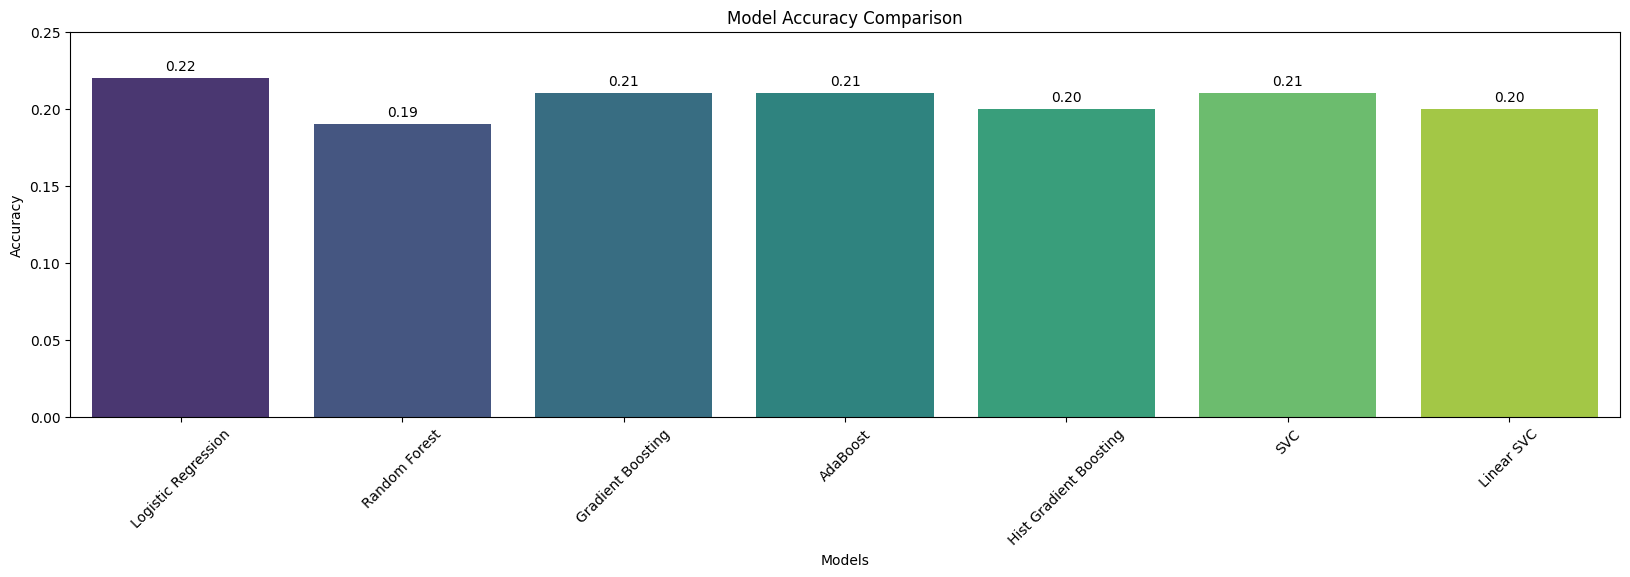

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names and their corresponding accuracies
models = [
    "Logistic Regression", "Random Forest", "Gradient Boosting", 
    "AdaBoost", "Hist Gradient Boosting", "SVC", "Linear SVC"
]
accuracies = [0.22, 0.19, 0.21, 0.21, 0.20, 0.21, 0.20]  # Extracted from your results

# Create the plot
plt.figure(figsize=(20, 5))
sns.barplot(x=models, y=accuracies, palette="viridis")

# Formatting the plot
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 0.25)  # Adjusting the scale for better visibility
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Display the values on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.2f}", ha='center')

plt.show()

